<a href="https://colab.research.google.com/github/yonathanm772/MLA_JMA/blob/main/Classification_In_class_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Prediction: Model Selection and Hyperparameter Tuning

In this notebook, you will:
1. Load the Titanic dataset from an online source.
2. Perform basic EDA to understand the data.
3. Use pipelines to preprocess numerical and categorical data.
4. Train and evaluate multiple classification models (KNN, SVC, Random Forest, Decision Tree, Logistic Regression, Bagging, and Boosting).
5. Conduct hyperparameter tuning to find the best model.
6. Write reflection on the findings

---

## 1. Importing Libraries
**Task**: Import the necessary libraries for data handling, visualization, model training, and evaluation.

In [1]:
#  Import the necessary libraries for data handling, visualization, model training, and evaluation.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

## 2. Load the titanic dataset from seaborn

In [2]:
titanic = sns.load_dataset('titanic')



In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 3. Basic EDA (Exploratory Data Analysis)
Question 1: What is the shape of the dataset?

In [4]:
# checks shape
titanic.shape

(891, 15)

Question 2: Are there any missing values?

In [5]:
# check missing values.
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


Question 3: Visualize some relationships (atleast 3). such as:

- The distribution of numerical features like age and fare.
- The survival rate by different classes, gender, etc.

In [6]:
numerical_features=['age', 'fare']

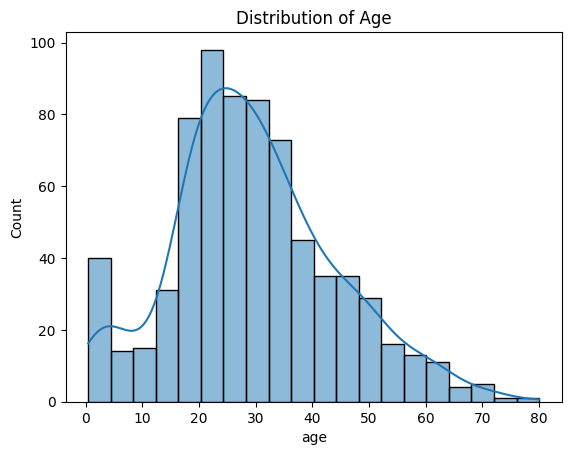

In [7]:
# create a histogram of age using sns
sns.histplot(data=titanic, x='age', kde=True)
plt.title('Distribution of Age')
plt.show()

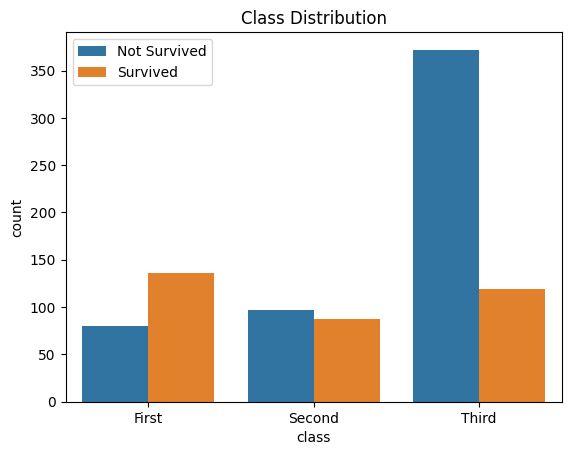

In [8]:
# create a sns.countplot on class
sns.countplot(data=titanic, x='class', hue= 'survived')
plt.legend(['Not Survived','Survived'])
plt.title('Class Distribution')
plt.show()

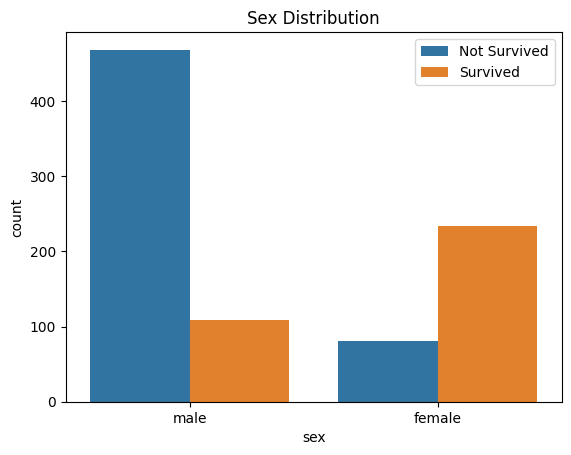

In [9]:
# create a sns.countplot on sex
sns.countplot(data=titanic, x='sex', hue = 'survived')
plt.legend(['Not Survived','Survived'])
plt.title('Sex Distribution')
plt.show()


### Split the data into training and testing sets

In [10]:
# Split the data into features and target
X = titanic[['age', 'fare', 'pclass', 'sex', 'embarked', 'who', 'alone']]
y = titanic['survived']


In [11]:
#split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Data Preprocessing with Pipelines
Task: Create a data preprocessing pipeline for numerical and categorical features.

- Numerical features: Use StandardScaler to scale them.
- Categorical features: Use OneHotEncoder to encode them.
- impute missing values

In [12]:
# Create a data preprocessing pipeline for numerical and categorical features
numerical_features = ['age', 'fare']
categorical_features = ['pclass', 'sex', 'embarked', 'who', 'alone']

In [13]:
#  Use StandardScaler to scale on numerical_features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [14]:
#  Use OneHotEncoder to scale on categorical_features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [15]:
# create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough')

## Training data with multiple models

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
# Define models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Bagging Classifier': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}



# Evaluate each model
for model_name, model in models.items():
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Print accuracy and classification report
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))




Model: K-Nearest Neighbors
Accuracy: 0.8156424581005587

Model: Logistic Regression
Accuracy: 0.7932960893854749

Model: Decision Tree
Accuracy: 0.7541899441340782

Model: Random Forest
Accuracy: 0.8100558659217877

Model: Support Vector Machine
Accuracy: 0.8044692737430168

Model: Bagging Classifier
Accuracy: 0.7877094972067039

Model: Gradient Boosting
Accuracy: 0.8268156424581006


#Hyperparameter Tuning
## Define parameter grids for the top 2 models
Example:
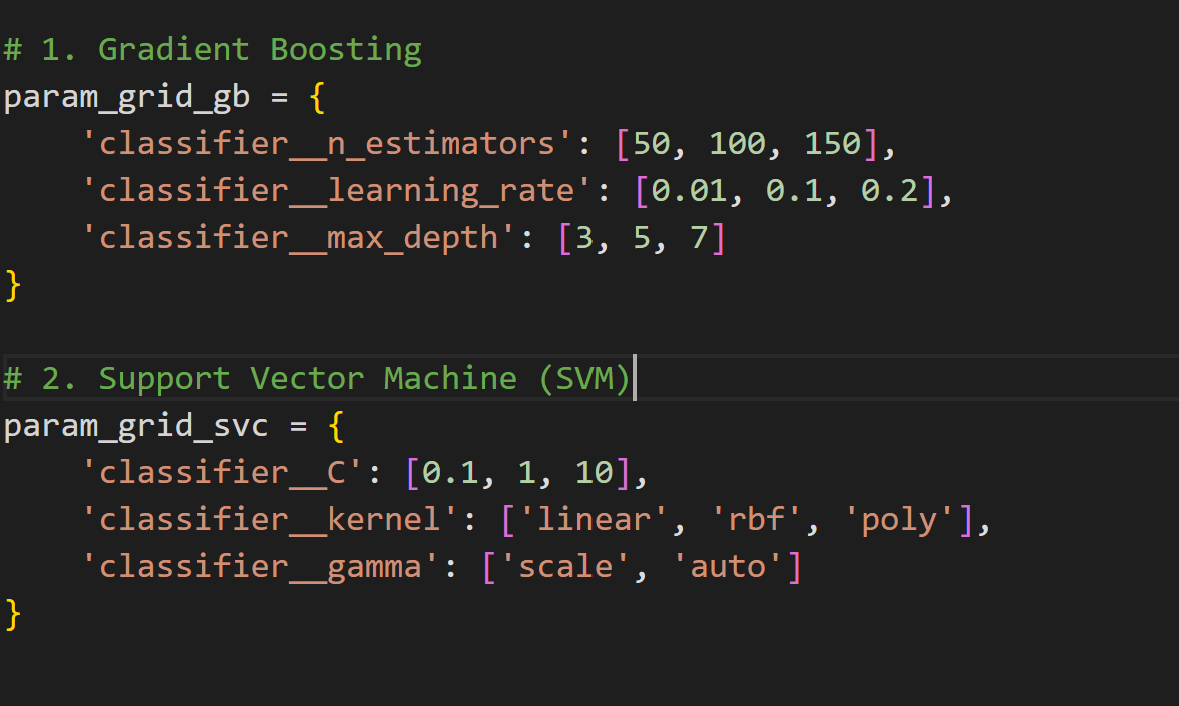

In [37]:
# gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
param_grid_gb = {
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [3, 5, 7]
}


In [38]:
# K-Nearest Neighbors
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]
}

## List of models and their corresponding parameter grids
Example
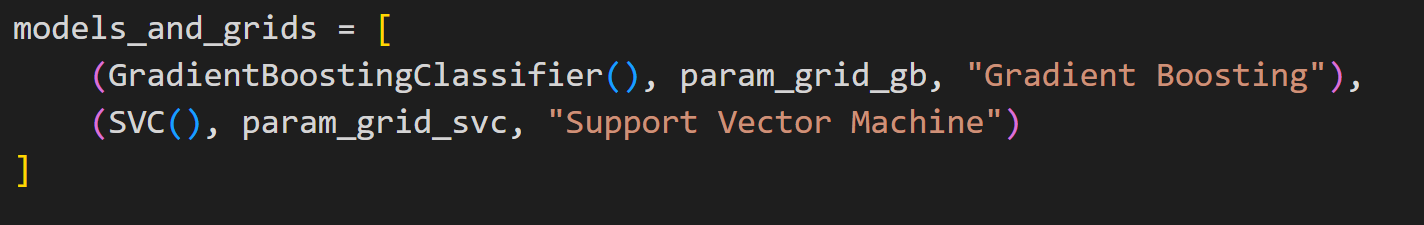

In [41]:
# List of models and their corresponding parameter grids
models_and_grids = [
    (GradientBoostingClassifier(), param_grid_gb, "Gradient Boosting"),
    (KNeighborsClassifier(), param_grid_knn, "K-Nearest Neighbors"),
]

In [42]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [43]:
# Loop through each model and perform GridSearchCV
for model, param_grid, model_name in models_and_grids:
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, y_train)


    # Output the best parameters and best cross-validation score for each model
    print(f"\nBest parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.4f}")


Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 150}
Best cross-validation accuracy for Gradient Boosting: 0.8244

Best parameters for K-Nearest Neighbors: {'classifier__n_neighbors': 5, 'classifier__p': 2, 'classifier__weights': 'distance'}
Best cross-validation accuracy for K-Nearest Neighbors: 0.8019


## 7.Reflection and Analysis
Which model performed the best without tuning?

1. Based on the initial accuracy scores, which model had the highest accuracy before hyperparameter tuning?
*   Gradient Boosting had the highest accuracy score with 82.6.


2. What are two best top performing model? How did hyperparameter tuning affect the top-performing models?
*   Gradient Boosting and K-Nearest Neighbors had the highest accuracy score with 82.6 and 81.5 respectively. It improved the accuracy scores, helping them to perfom better on new data. It also helps with overfitting or underfitting.
*   For both models, the accuracy scores were lowered after performing the hypermarameter tunnings.


3. Compare the accuracy scores before and after tuning for each of the top-performing models. Which model showed the most improvement?
For both models, the accuracy scores were lowered after performing the hypermarameter tunnings. None of them did.

4. Summarize the optimal parameters found during hyperparameter tuning. How do these optimal parameters differ from the default ones?

*   `Gradient Boosting Classifier: Optimal Parameters: Learning Rate: 0.01, Max Depth: 3, Number of Estimators: 150, Best Cross-Validation Accuracy: 0.8244.`
Default Learning Rate: The default value is typically around 0.1. The optimal value of 0.01 suggests a more conservative approach, which can lead to better convergence but may require more estimators.
Default Max Depth: The default is usually 3 or 5. Here, it remains at 3, which may help prevent overfitting.
Default Number of Estimators: Defaults can range from 100 to 200. The chosen value of 150 indicates an increase in complexity, balancing performance and training time.
    
*   `K-Nearest Neighbors Classifier: Optimal Parameters: Number of Neighbors: 5, Distance Metric (p): 2 (Euclidean distance), Weights: Distance, Best Cross-Validation Accuracy: 0.8019.`
Default Number of Neighbors: The default is often 5, so this value remains unchanged.
Default Distance Metric (p): The default is usually 2 (Euclidean distance). Using this confirms that the model performs well with the standard metric.
Default Weights: The default is typically "uniform." Using "distance" as optimal suggests that giving closer neighbors more influence can improve performance.

5. Did any model experience overfitting after tuning?
Examine the training versus test accuracy for each of the top models after tuning.
Based on your findings, which model would you select for deployment, and why?
None of the models experience overfitting after the hyperparameter tunning. I would choose` Choose Gradient Boosting` for deployment due to its better performance on the test set, indicating it is more likely to generalize well to new data.

6. Considering both performance (accuracy) and other factors like model complexity and interpretability, which model would you choose as the best candidate for deployment? Explain your reasoning.


*   If performance is the highest priority and the dataset is relatively large and complex, **Gradient Boosting** would be the preferred choice due to its better accuracy and capability to handle complex relationships in the data.
*   If interpretability and simplicity are more critical, particularly in applications where stakeholders need to understand model decisions (e.g., healthcare or finance), **K-Nearest Neighbors** may be the better option despite its slightly lower accuracy.





